In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import scanpy as sc
adata = sc.read_h5ad("clono_filtered_counts_adata.h5ad")
adata

AnnData object with n_obs × n_vars = 25066 × 15093
    obs: 'cell_id', 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'percent_mito', 'Response_3m', 'sample_source'
    var: 'gene_name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

Plot the distribution of the count matrix

In [2]:
adata2 = adata.copy()

In [3]:
# Normalize the data for running highly_variable_genes
sc.pp.normalize_total(adata2)
# Logarithmize the data
sc.pp.log1p(adata2)

In [9]:
# Assuming adata is your AnnData object
# Convert the expression matrix to a DataFrame
df = pd.DataFrame(adata.X.toarray())



In [16]:
total_gene_ep = adata.X.sum(axis=1)

In [20]:
total_gene_ep

matrix([[  630.],
        [17727.],
        [ 1112.],
        ...,
        [ 5413.],
        [ 2246.],
        [ 4023.]], dtype=float32)

In [21]:
total_gene_ep = np.array(total_gene_ep).flatten()

In [25]:
# log transform the data
total_gene_ep_norm = np.log1p(np.array(total_gene_ep).flatten())

In [22]:
# Create a DataFrame with the total gene expression and sample source
df = pd.DataFrame({
    'Expression': total_gene_ep,
    'sample_source': adata.obs['sample_source']
})


/tmp/ipykernel_117177/2103587156.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)
/tmp/ipykernel_117177/2103587156.py:13: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)


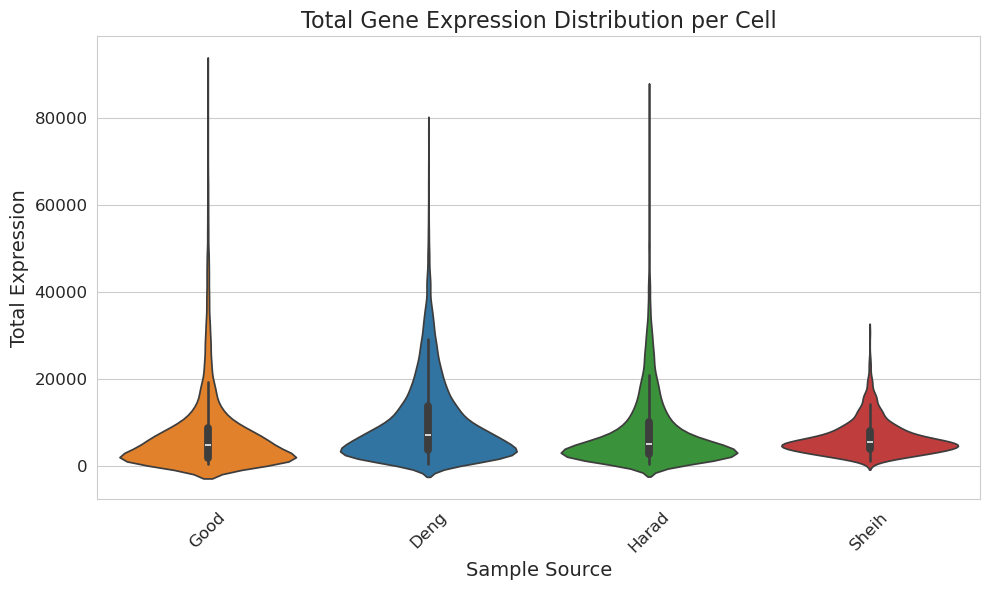

In [24]:
# Create the plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom color palette
custom_palette = ["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]

# Set the plot style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Gene Expression Distribution per Cell', fontsize=16)
plt.xlabel('Sample Source', fontsize=14)
plt.ylabel('Total Expression', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

Plot one for normalized data

In [26]:
# Create a DataFrame with the total gene expression and sample source
df = pd.DataFrame({
    'Expression': total_gene_ep_norm,
    'sample_source': adata.obs['sample_source']
})


/tmp/ipykernel_117177/790927540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)
/tmp/ipykernel_117177/790927540.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)


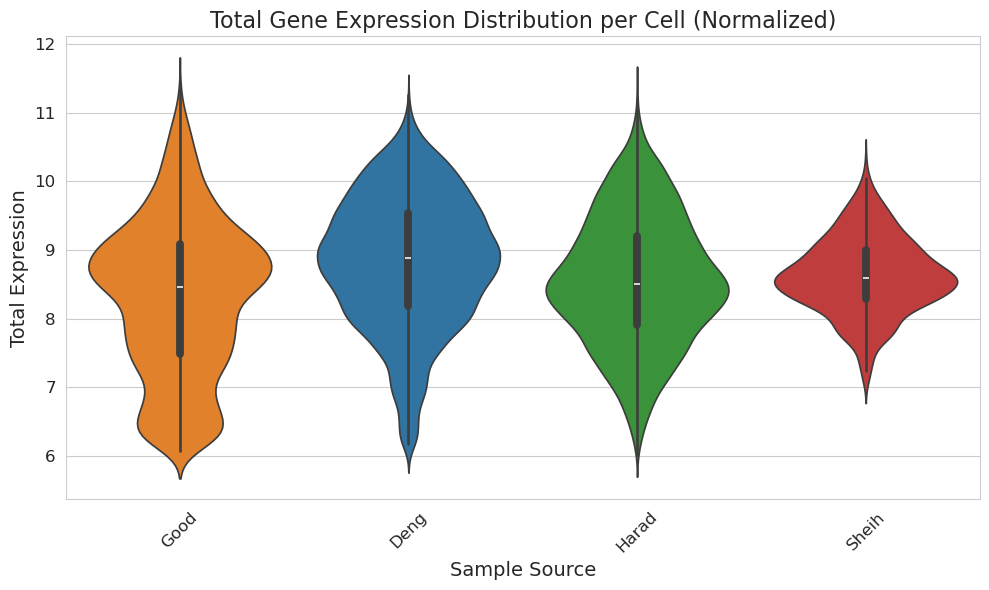

In [28]:
# Set a custom color palette
custom_palette = ["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]

# Set the plot style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sample_source', y='Expression', palette=custom_palette)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Gene Expression Distribution per Cell (Normalized)', fontsize=16)
plt.xlabel('Sample Source', fontsize=14)
plt.ylabel('Total Expression', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

In [17]:
total_gene_ep

matrix([[  630.],
        [17727.],
        [ 1112.],
        ...,
        [ 5413.],
        [ 2246.],
        [ 4023.]], dtype=float32)

In [15]:


# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=total_gene_ep, x='sample_source', y='Expression')
plt.xticks(rotation=45)
plt.title('Gene Expression Distribution')
plt.xlabel('Sample')
plt.ylabel('LogNormalized Expression')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.matrix'>.

<Figure size 1000x600 with 0 Axes>